In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [2]:
print(exchange_rates.head())
print(exchange_rates.tail())
print(exchange_rates.info())

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

In [3]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [4]:
euro_to_dollar = exchange_rates.copy()[['Time', 'US_dollar']]

In [5]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.3532     6
          ..
1.1042     1
1.2941     1
1.3553     1
1.5068     1
1.4579     1
Name: US_dollar, Length: 3528, dtype: int64

In [6]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar']!='-']
euro_to_dollar.shape

(5637, 2)

In [7]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

In [8]:
%matplotlib inline

euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar.iloc[28:31]

,Time,US_dollar,rolling_mean
28,1999-02-11,1.1312,NaN
29,1999-02-12,1.1244,1.150667
30,1999-02-15,1.1238,1.148830


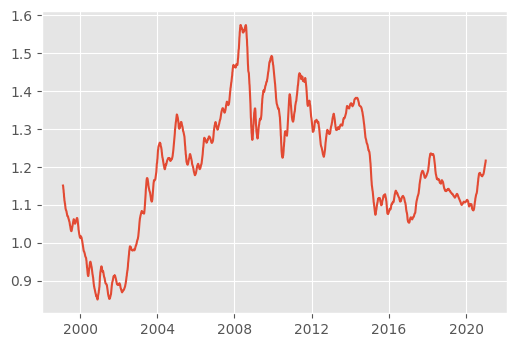

In [9]:
plt.style.use('ggplot')
plt.plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean'])

In [10]:
euro_to_dollar[['Time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    5637 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 88.1 KB


In [11]:
euro_to_dollar['Year'] = euro_to_dollar['Time'].dt.year
euro_to_dollar['Year'].value_counts().sort_index()

1999    259
2000    255
2001    254
2002    255
2003    255
2004    259
2005    257
2006    255
2007    255
2008    256
2009    256
2010    258
2011    257
2012    256
2013    255
2014    255
2015    256
2016    257
2017    255
2018    255
2019    255
2020    257
2021      5
Name: Year, dtype: int64

In [12]:
%matplotlib inline
import matplotlib
matplotlib.style.use('fivethirtyeight')

In [13]:
euro_to_dollar = euro_to_dollar.copy()[euro_to_dollar['rolling_mean']!=0]

In [43]:
import numpy as np

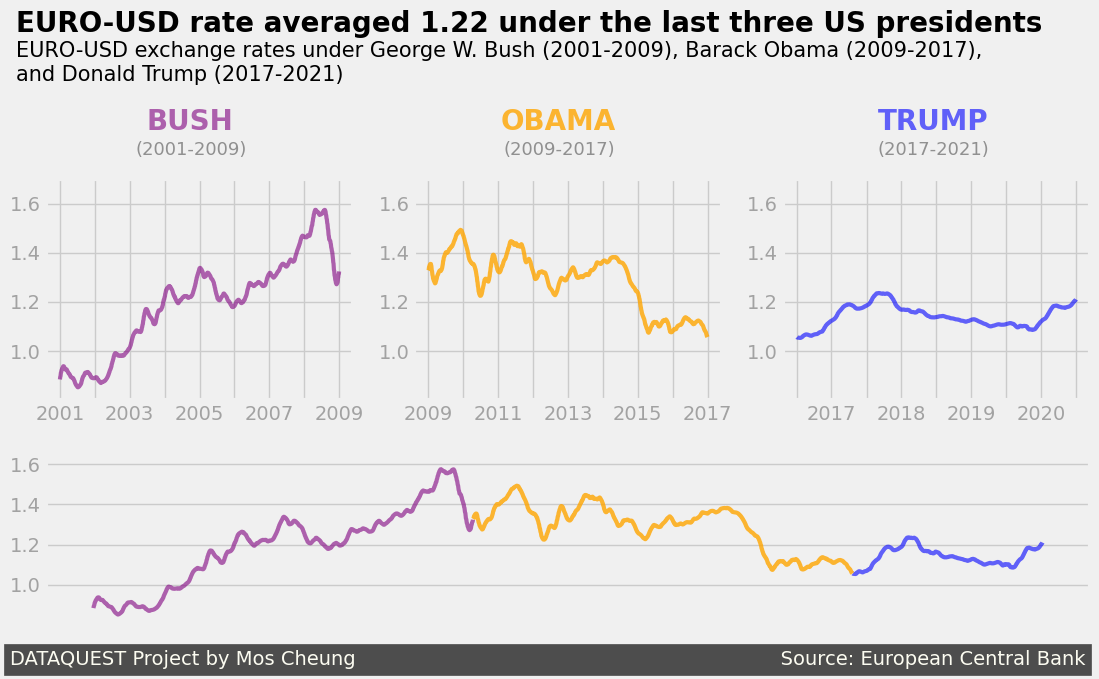

In [105]:
fig = plt.figure(figsize=(12,6))

gs = fig.add_gridspec(2,3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, :])

ax1.plot(euro_to_dollar[euro_to_dollar['Year'].between(2001,2008,inclusive='left')]['Time'],
         euro_to_dollar[euro_to_dollar['Year'].between(2001,2008,inclusive='left')]['rolling_mean'],
         color='purple', alpha=.6,
         linewidth=3)
ax1.set_ylim([.8,1.7])
ax1.set_xticklabels(['','2001','','2003','','2005','','2007','','2009'], alpha=.5)
ax1.set_yticklabels(['','1.0','1.2','1.4','1.6'], alpha=.5)

ax2.plot(euro_to_dollar[euro_to_dollar['Year'].between(2009,2016,inclusive='left')]['Time'],
         euro_to_dollar[euro_to_dollar['Year'].between(2009,2016,inclusive='left')]['rolling_mean'],
         color='orange', alpha=.8,
         linewidth=3)
ax2.set_ylim([.8,1.7])
ax2.set_xticklabels(['','2009','','2011','','2013','','2015','','2017'], alpha=.5)
ax2.set_yticklabels(['','1.0','1.2','1.4','1.6'], alpha=.5)

ax3.plot(euro_to_dollar[euro_to_dollar['Year'].between(2017,2020,inclusive='left')]['Time'],
         euro_to_dollar[euro_to_dollar['Year'].between(2017,2020,inclusive='left')]['rolling_mean'],
         color='blue', alpha=.6,
         linewidth=3)
ax3.set_ylim([.8,1.7])
ax3.set_xticklabels(['','2017','','2018','','2019','','2020','','2021'], alpha=.5)
ax3.set_yticklabels(['','1.0','1.2','1.4','1.6'], alpha=.5)

ax4.plot(euro_to_dollar[euro_to_dollar['Year'].between(2001,2020,inclusive='left')]['Time'],
         euro_to_dollar[euro_to_dollar['Year'].between(2001,2020,inclusive='left')]['rolling_mean'],
         color='purple', alpha=0,
         linewidth=3)
ax4.plot(euro_to_dollar[euro_to_dollar['Year'].between(2001,2008,inclusive='left')]['Time'],
         euro_to_dollar[euro_to_dollar['Year'].between(2001,2008,inclusive='left')]['rolling_mean'],
         color='purple', alpha=.6,
         linewidth=3)
ax4.plot(euro_to_dollar[euro_to_dollar['Year'].between(2009,2016,inclusive='left')]['Time'],
         euro_to_dollar[euro_to_dollar['Year'].between(2009,2016,inclusive='left')]['rolling_mean'],
         color='orange', alpha=.8,
         linewidth=3)
ax4.plot(euro_to_dollar[euro_to_dollar['Year'].between(2017,2020,inclusive='left')]['Time'],
         euro_to_dollar[euro_to_dollar['Year'].between(2017,2020,inclusive='left')]['rolling_mean'],
         color='blue', alpha=.6,
         linewidth=3)
ax4.set_xticklabels([])
ax4.set_ylim([.6,1.7])
ax4.set_yticks([1.0, 1.2, 1.4, 1.6])
ax4.set_yticklabels(['1.0','1.2','1.4','1.6'], alpha=.5)
ax4.grid(axis='x')

ax1.text(np.datetime64('2003-07-01 00:00:00'),1.9,s='BUSH',weight='bold',color='purple',alpha=.6,size=20)
ax1.text(np.datetime64('2003-03-01 00:00:00'),1.8,s='(2001-2009)',alpha=.4,size=13)

ax2.text(np.datetime64('2011-02-01 00:00:00'),1.9,s='OBAMA',weight='bold',color='orange',alpha=.8,size=20)
ax2.text(np.datetime64('2011-03-01 00:00:00'),1.8,s='(2009-2017)',alpha=.4,size=13)

ax3.text(np.datetime64('2018-03-01 00:00:00'),1.9,s='TRUMP',weight='bold',color='blue',alpha=.6,size=20)
ax3.text(np.datetime64('2018-03-01 00:00:00'),1.8,s='(2017-2021)',alpha=.4,size=13)

ax1.text(np.datetime64('1999-10-01 00:00:00'),2.3,
         s='EURO-USD rate averaged 1.22 under the last three US presidents',
         weight='bold',size=20)
ax1.text(np.datetime64('1999-10-01 00:00:00'),2.2,
         s='EURO-USD exchange rates under George W. Bush (2001-2009), Barack Obama (2009-2017),',
         size=15)
ax1.text(np.datetime64('1999-10-01 00:00:00'),2.1,
         s='and Donald Trump (2017-2021)',
         size=15)

ax4.text(np.datetime64('1999-04-01 00:00:00'), .6,
         backgroundcolor='#4d4d4d', color='#fcfcf1',
         s='DATAQUEST Project by Mos Cheung' + ' '*68 + 'Source: European Central Bank')

plt.show()